In [72]:
from modeci_mdf.mdf import *

# Create a model containing one graph
mod = Model(id="AG")
mod_graph = Graph(id="ag_example")

#append the Graph object to the Model
mod.graphs.append(mod_graph)

In [73]:
a_node = Node(id="X")
a_node.input_ports.append(InputPort(id="input"))

#https://mdf.readthedocs.io/en/latest/api/Specification.html#parameter
#Add a stateless parameter - this is a parameter which will evaluate to the same value every execution of the node (for the same external inputs)
a_node.parameters.append(Parameter(id="pi", value=3.14))

#Add a stateful parameter - this is a parameter whose value is influenced by a previous value of a parameter, possibly itself
p1 = Parameter(
    id="pii",
    value="pi",
)
a_node.parameters.append(p1)


# Add an output port
a_node.output_ports.append(OutputPort(id="output", value="pii"))

# Add node to the graph
mod_graph.nodes.append(a_node)

# Print current structure as YAML
print(mod_graph.to_yaml())


ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii



In [74]:
b_node = Node(id="Y")
b_node.input_ports.append(InputPort(id="input"))

#https://mdf.readthedocs.io/en/latest/api/Specification.html#parameter
#Add a stateless parameter - this is a parameter which will evaluate to the same value every execution of the node (for the same external inputs)
b_node.parameters.append(Parameter(id="pi", value=3.14))

#Add a stateful parameter - this is a parameter whose value is influenced by a previous value of a parameter, possibly itself
p1 = Parameter(
    id="circle_perimeter",
    value="2*pi*input",
)
b_node.parameters.append(p1)


# Add an output port
b_node.output_ports.append(OutputPort(id="output", value="circle_perimeter"))

# Add node to the graph
mod_graph.nodes.append(b_node)

# Print current structure as YAML
print(mod_graph.to_yaml())



ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii
        Y:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                circle_perimeter:
                    value: 2*pi*input
            output_ports:
                output:
                    value: circle_perimeter



In [75]:
c_node = Node(id="Z")
c_node.input_ports.append(InputPort(id="input"))



#https://mdf.readthedocs.io/en/latest/api/Specification.html#parameter
#Add a stateless parameter - this is a parameter which will evaluate to the same value every execution of the node (for the same external inputs)
c_node.parameters.append(Parameter(id="pi", value=3.14))

#Add a stateful parameter - this is a parameter whose value is influenced by a previous value of a parameter, possibly itself
p1 = Parameter(
    id="sphere_volume",
    value="4/3 *pi* input*input*input",
)
c_node.parameters.append(p1)


# Add an output port
c_node.output_ports.append(OutputPort(id="output", value="sphere_volume"))

# Add node to the graph
mod_graph.nodes.append(c_node)

# Print current structure as YAML
print(mod_graph.to_yaml())




ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii
        Y:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                circle_perimeter:
                    value: 2*pi*input
            output_ports:
                output:
                    value: circle_perimeter
        Z:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                sphere_volume:
                    value: 4/3 *pi* input*input*input
            output_ports:
                output:
                    value: sphere_volume



In [76]:
# This helper method just adds an edge connecting the first output port of 
# the pre node to the first input port of the post node
from modeci_mdf.utils import simple_connect

e1 = simple_connect(a_node, b_node, mod_graph)

# Print the current structure
print(mod_graph.to_yaml())


ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii
        Y:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                circle_perimeter:
                    value: 2*pi*input
            output_ports:
                output:
                    value: circle_perimeter
        Z:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                sphere_volume:
                    value: 4/3 *pi* input*input*input
            output_ports:
                output:
                    value: sphere_volume
    edges:
        edge_X_Y:
            sender: X
            receiver: Y
            se

In [77]:
# This helper method just adds an edge connecting the first output port of 
# the pre node to the first input port of the post node
from modeci_mdf.utils import simple_connect

e1 = simple_connect(a_node, c_node, mod_graph)

# Print the current structure
print(mod_graph.to_yaml())


ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii
        Y:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                circle_perimeter:
                    value: 2*pi*input
            output_ports:
                output:
                    value: circle_perimeter
        Z:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                sphere_volume:
                    value: 4/3 *pi* input*input*input
            output_ports:
                output:
                    value: sphere_volume
    edges:
        edge_X_Y:
            sender: X
            receiver: Y
            se

In [78]:
mod.to_json_file("AG.json")
mod.to_yaml_file("AG.yaml")

'AG.yaml'

Converting MDF graph: ag_example to graphviz (level: 3, format: png)
    Node: X
    Node: Y
    Node: Z
    Edge: edge_X_Y connects X to Y
    Edge: edge_X_Z connects X to Z
Written graph image to: AG.png


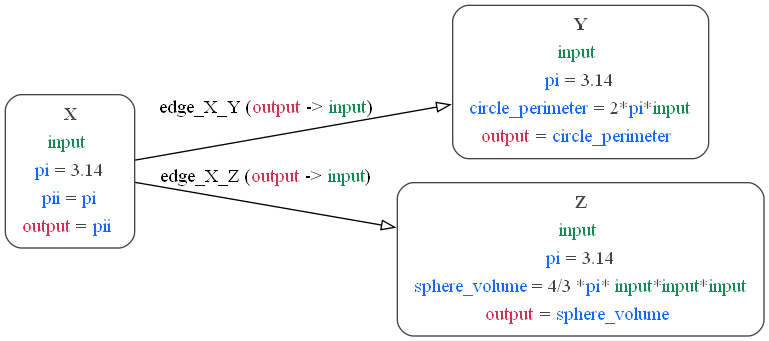

In [79]:
mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="AG",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="AG.png")

In [80]:
from modeci_mdf.execution_engine import EvaluableGraph

eg = EvaluableGraph(mod_graph, verbose=False)
eg.evaluate()

print('Output of X: %s'%eg.enodes["X"].evaluable_outputs["output"].curr_value)
print('Output of Y: %s'%eg.enodes["Y"].evaluable_outputs["output"].curr_value)
print('Output of Z: %s'%eg.enodes["Z"].evaluable_outputs["output"].curr_value)


Init graph: ag_example
Evaluating graph: ag_example, root nodes: ['X'], with array format numpy
Output of X: 3.14
Output of Y: 19.7192
Output of Z: 129.61561621333334


In [81]:
import numpy as np 
#Convert the value of the parameter to a numpy array
a_node.get_parameter('pi').value = np.array([[1,2],[3,4]])

eg.evaluate()

print('Output of X:\n%s'%eg.enodes["X"].evaluable_outputs["output"].curr_value)
print('Output of Y:\n%s'%eg.enodes["Y"].evaluable_outputs["output"].curr_value)
print('Output of Z:\n%s'%eg.enodes["Z"].evaluable_outputs["output"].curr_value)

Evaluating graph: ag_example, root nodes: ['X'], with array format numpy
Output of X:
[[1 2]
 [3 4]]
Output of Y:
[[ 6.28 12.56]
 [18.84 25.12]]
Output of Z:
[[  4.18666667  33.49333333]
 [113.04       267.94666667]]


In [82]:
#This condition means that A is always executed
cond_a = Condition(type="Always")

#This condition means that B will execute when A has run 3 times
cond_b = Condition(type="EveryNCalls", dependencies=a_node.id, n=4)  


cond_c = Condition(type="EveryNCalls", dependencies=b_node.id, n=2)  


In [83]:
#add the conditions to the Graph
mod_graph.conditions = ConditionSet(
    node_specific={a_node.id: cond_a, b_node.id: cond_b, c_node.id :cond_c},
)

# Print the current structure
print(mod_graph.to_yaml())

ag_example:
    nodes:
        X:
            input_ports:
                input: {}
            parameters:
                pi:
                    value:
                    -   - 1
                        - 2
                    -   - 3
                        - 4
                pii:
                    value: pi
            output_ports:
                output:
                    value: pii
        Y:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                circle_perimeter:
                    value: 2*pi*input
            output_ports:
                output:
                    value: circle_perimeter
        Z:
            input_ports:
                input: {}
            parameters:
                pi:
                    value: 3.14
                sphere_volume:
                    value: 4/3 *pi* input*input*input
            output_ports:
                output:
                    val

Converting MDF graph: ag_example to graphviz (level: 2, format: png)
    Node: X
    Node: Y
    Node: Z
    Edge: edge_X_Y connects X to Y
    Edge: edge_X_Z connects X to Z
Written graph image to: conditions.png


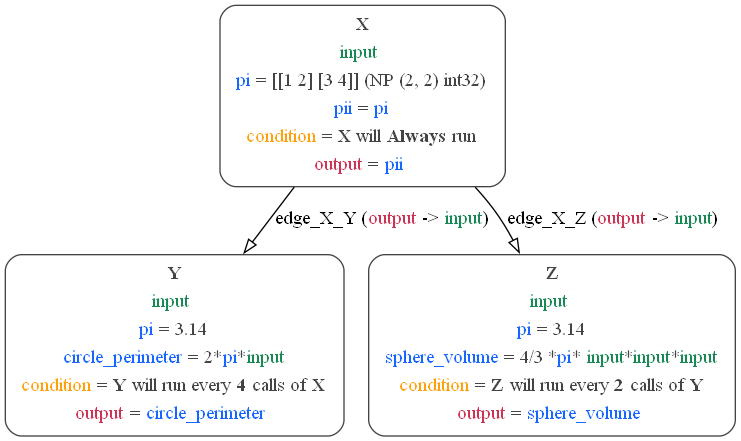

In [84]:
mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=2,
        filename_root="conditions"
    )

from IPython.display import Image
Image(filename="conditions.png")

In [85]:
from modeci_mdf.execution_engine import EvaluableGraph

eg = EvaluableGraph(mod_graph, verbose=False)
#Calling the evaluate method will print out the order of the execution of Nodes per the set conditions
#Expected to be ('A','A','A','B')
eg.evaluate()

#The Output of A expected to be 3 as it executes 3 times
print('Output of X: %s'%eg.enodes["X"].evaluable_outputs["output"].curr_value) 

#The Output of B expected to be 1 as it executes only once
print('Output of Y: %s'%eg.enodes["Y"].evaluable_outputs["output"].curr_value) 

print('Output of Z: %s'%eg.enodes["Z"].evaluable_outputs["output"].curr_value) 



Init graph: ag_example
Evaluating graph: ag_example, root nodes: ['X'], with array format numpy
Output of X: [[1 2]
 [3 4]]
Output of Y: [[ 6.28 12.56]
 [18.84 25.12]]
Output of Z: [[  4.18666667  33.49333333]
 [113.04       267.94666667]]
